In [1]:
%matplotlib inline

Our dataset is again the iris flower dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set. Just that you know what these iris flowers are...


**Iris Setosa**
![iris_setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)

**Iris Versicolor**
![iris_versicolor](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg)

**Iris Virginica**
![iris_virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/440px-Iris_virginica.jpg)

![taxonomy](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png)



In case you did not convert the Excel file with the iris flower dataset to CSV file earlier, you are lucky since you can import it from `sklearn.datasets`. You have to install the correspoonding package.


```bash
pip install sklearn
```

Since `sklearn` depends on `scipy` it might be, that you have to install this dependency too in case you do not already have it.

```bash
pip install scipy
```


However, we simplify this dataset a bit and say we are only interested in *iris setosa* and other iris flowers. 

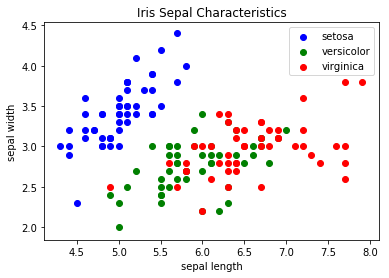

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()
colors = 'bgr'
for idx, name in enumerate(iris.target_names):

    sepal_length = iris.data[iris.target == idx][:,0]
    sepal_width = iris.data[iris.target == idx][:,1]

    plt.scatter(sepal_length, sepal_width, c=colors[idx], label=name)

plt.title('Iris Sepal Characteristics')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()
plt.show()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

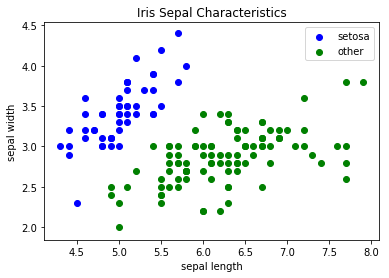

In [4]:
sepal_length = iris.data[iris.target == 0][:,0]
sepal_width = iris.data[iris.target == 0][:,1]
plt.scatter(sepal_length, sepal_width, c='b', label='setosa')

sepal_length = iris.data[iris.target != 0][:,0]
sepal_width = iris.data[iris.target != 0][:,1]
plt.scatter(sepal_length, sepal_width, c='g', label='other')

plt.title('Iris Sepal Characteristics')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()
plt.show()

# Intro to Perceptrons

Let's say we want to write an artificial intelligence, i.e., a program, that learns out of the given data about sepal length and width, if a given iris flower is an iris setosa or if it is not.

We can do this with a single artificial brain cell, a perceptron. The original paper for Perceptron Learning Algorithm (PLA) is from the 50s.

*"The Perceptron: A Probabilistic Model For Information Storage And Organization in the Brain"* - F. Rosenblatt (December 1958)
http://www.ling.upenn.edu/courses/Fall_2007/cogs501/Rosenblatt1958.pdf


## A perceptron?

A *perceptron* is a 
> hypothetical nervous system, or machine,...

see the above paper. Or, according to the Oxford Dictionary, *perceptron* is a 
> a computer model or computerized machine devised to represent or simulate the ability of the brain to recognize and discriminate.


![](https://appliedgo.net/media/perceptron/neuron.png)



To see what is going on in a perceptron, see the animation at https://appliedgo.net/perceptron/ in the section *Inside an artificial neuron*.

That is, we can implement aa activation function and a perceptron in Python as in the following.

[-10, 9, -2, 2]

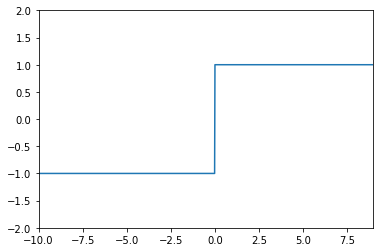

In [5]:
import numpy as np


def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1


rnge = np.linspace(-10.0, 10.0, num=1000)
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)
plt.axis([-10, 9, -2, 2])

In [6]:
import numpy as np


def perceptron(inp, weights):
    # This is the same as the dot product np.dot(i, w)
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

perceptron([1, 2, 3, 4, 5], [1, 1, 2, 1, 1])

1

# Perceptrons for Classification

Using our perceptron, we want to have a program which can *predict* -given a pair of sepal length and sepal width- if our flower is an iris setosa or not. That is, we want to have a program that says `setosa` (or `1`) for example for `[5.6, 4.8]` or for `[3.4, 4.1]` and it says `other` (or `-1`) for example for `[5.8, 1.9]` or for `[6.2, 2.4]`. Note that all those examples are "new" flowers, i.e., we did not observe those value combinations on earlier flowers. Additionally, our program should return the correct class labels for flowers, which we already know from the iris flower dataset.

In [7]:
def predict(inp_vec, weights):
    """
    inp_vec:
        An input vector consisting of sepal length and width
    return:
        A class label, either 1 for 'setosa' or -1 for 'other'
    """
    class_label = perceptron(inp_vec, weights)
    return class_label


weights = [-2.60105969, 3.61349319]

# new flowers
assert predict([5.6, 4.8], weights) == 1
assert predict([3.4, 4.1], weights) == 1
assert predict([5.8, 1.9], weights) == -1
assert predict([6.2, 2.4], weights) == -1

# flowers we already know
assert predict([5.4,  3.9], weights) == 1
assert predict([5.7,  4.4], weights) == 1

Given the above program, we could say that we are done, no? The program obviously satisfies the requirements described above. However, the question is where do the weights (`weights = [-2.60105969, 3.61349319]`) come from? Here, I have given them to you but where did I get them from?

Actually, they were automatically learned by the program using the Perceptron Learning Algorithm (PLA), which we are going to implement in the following.

To do so, we need a trainings dataset. We will use the one in which we specified which iris flowers are of type setosa or of another type.

In [8]:
class_labels = np.copy(iris.target)
class_labels[class_labels != 0] = -1
class_labels[class_labels == 0] = 1
#class_labels[class_labels == -1] = 0

trainings_data = [(d[:2], l) for d, l in zip(iris.data, class_labels)]
trainings_data[:10]

[(array([ 5.1,  3.5]), 1),
 (array([ 4.9,  3. ]), 1),
 (array([ 4.7,  3.2]), 1),
 (array([ 4.6,  3.1]), 1),
 (array([ 5. ,  3.6]), 1),
 (array([ 5.4,  3.9]), 1),
 (array([ 4.6,  3.4]), 1),
 (array([ 5. ,  3.4]), 1),
 (array([ 4.4,  2.9]), 1),
 (array([ 4.9,  3.1]), 1)]

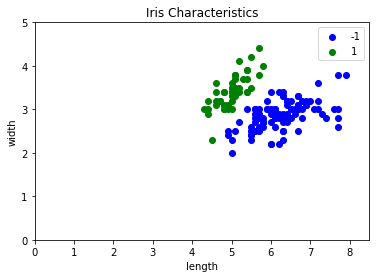

In [9]:
from itertools import cycle


def plot_data(data, w_line=(0, 0)):
    """
    data:
        
    """
    # print(data[:10])
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line != (0, 0):
        l = np.linspace(0, 8.5)
        m, b = w_line
        plt.plot(l, m * l + b, 'y-', lw=2)

    plt.axis([0, 8.5, 0, 5])
    plt.title('Iris Characteristics')
    plt.xlabel('length')
    plt.ylabel('width')
    plt.legend()

    
plot_data(trainings_data)

In [10]:
import numpy as np


def pla(training_data, no_iterations=10000, eta=0.5):
    # eta is the learning rate
    # initial_error
    error = np.random.random()
    dim = len(training_data[0][0])
    weights =  np.random.random(dim)
    weight_history = [np.copy(weights)]

    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output
        # print(error)
        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))
        
    return weights, weight_history 
        

learned_weights, weight_history = pla(trainings_data)
learned_weights


array([-31.51195725,  48.0464758 ])

In [ ]:
weight_history

In [12]:
# new flowers
print(predict([5.6, 4.8], learned_weights))
print(predict([3.4, 4.1], learned_weights))
print(predict([5.8, 1.9], learned_weights))
print(predict([6.2, 2.4], learned_weights))

# flowers we already know
print(predict([5.4, 3.9], learned_weights))
print(predict([5.7, 4.4], learned_weights))

1
1
-1
-1
1
1


# What was going on here?

Let's visualize how the weights slice our feature space and how they developed over the iterations... 

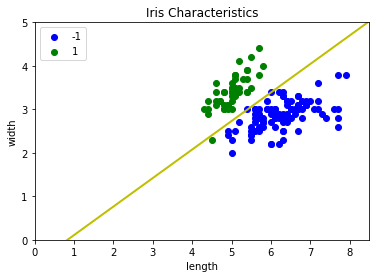

In [13]:
def compute_line(weights):
    norm = np.linalg.norm(weights)
    ww = weights / norm
    ww1 = [ww[1], -ww[0]]
    ww2 = [-ww[1] , ww[0]]
                
    # slope and intercept
    m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0])
    b = ((ww2[0] - ww1[0]) * m) + ww1[1]
    
    return m, b


plot_data(trainings_data, compute_line(learned_weights))

In the following you see how the weights and thereby the line discriminating our iris flower dataset. See the code that creates the animated Gif in the end of the notebook.

![weights](./images/animated.gif)

# We add a bias input...


[-61.5944892  89.6084061]


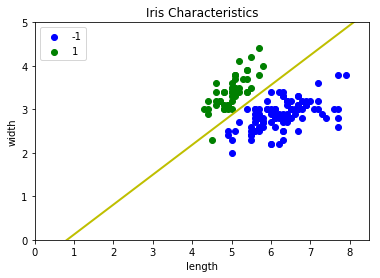

In [16]:
import numpy as np


def pla(training_data, no_iterations=50000, w_bias=False, eta=0.5):
    # eta is the learning rate
    # initial_error
    error = np.random.random()
    dim = len(training_data[0][0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]

    if w_bias:
        weights = np.random.random(dim + 1)
        data = np.array(list(zip(*training_data))[0])
        biases = np.ones((data.shape[0], 1))
        training_data_w_bias = np.append(data, biases, axis=1)
        
        training_data = list(zip(training_data_w_bias, 
                                 list(zip(*training_data))[1]))
    
    for i in range(no_iterations):
        inp_vec, expected_label = training_data[i % len(training_data)]
        perceptron_output = perceptron(inp_vec, weights)
        error = expected_label - perceptron_output

        weights += eta * error * inp_vec
        weight_history.append(np.copy(weights))

    return weights, np.array(weight_history)


learned_weights, weight_history = pla(trainings_data, w_bias=True)
learned_weights = learned_weights[:2]
print(learned_weights)


plot_data(trainings_data, compute_line(learned_weights))

In [20]:
print(predict([5.6, 4.8], learned_weights))
print(predict([3.4, 4.1], learned_weights))
print(predict([5.8, 1.9], learned_weights))
print(predict([6.2, 2.4], learned_weights))

# flowers we already know
print(predict([5.4, 3.9], learned_weights))
print(predict([5.7, 4.4], learned_weights))

1
1
-1
-1
1
1


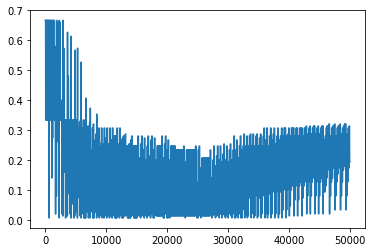

In [17]:
def compute_error_rate(data, model):
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)
    
    errors = np.array([predict(vec, model) for vec in data_points])
    c_falsy_elements = np.sum(errors != class_labels)
    return c_falsy_elements / len(class_labels)


error_rates = [compute_error_rate(trainings_data, i) for i in weight_history]

plt.plot(error_rates)
plt.show()

Error 0.006666666666666667 after 18051 iiterations
[-41.9177307   62.85462773]


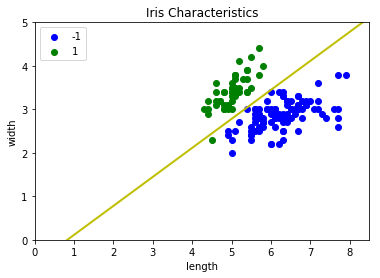

In [20]:
from tqdm import tqdm


def pla(training_data, no_iterations=10000, w_bias=False, eta=0.5):
    # eta is the learning rate
    # initial_error
    error = np.random.random()
    dim = len(training_data[0])
    weights = np.random.random(dim)
    weight_history = [np.copy(weights)]
    error_rates = []

    if w_bias:
        weights = np.random.random(dim + 1)
        data = np.array(list(zip(*training_data))[0])
        biases = np.ones((data.shape[0], 1))
        training_data_w_bias = np.append(data, biases, axis=1)
        
        training_data = list(zip(training_data_w_bias, 
                                 list(zip(*training_data))[1]))   
    
    if no_iterations == -1:
        i = 0
        error_rate = 1.0
        while True:
            inp_vec, expected_label = training_data[i % len(training_data)]
            perceptron_output = perceptron(inp_vec, weights)
            error = expected_label - perceptron_output
            
            weights += eta * error * inp_vec
            weight_history.append(np.copy(weights))
            
            error_rate = compute_error_rate(training_data, weights)
            error_rates.append(error_rate)
            if error_rate < 0.01:
                break
            i += 1
        print('Error {} after {} iiterations'.format(error_rate, i))
    else:
        for i in tqdm(range(no_iterations)):
            inp_vec, expected_label = training_data[i % len(training_data)]
            perceptron_output = perceptron(inp_vec, weights)
            error = expected_label - perceptron_output
            
            weights += eta * error * inp_vec
            weight_history.append(np.copy(weights))
            
            error_rate = compute_error_rate(training_data, weights)
            error_rates.append(error_rate)
        
    return weights, np.array(weight_history), error_rates

learned_weights, h, error_rates = pla(trainings_data, no_iterations=-1, w_bias=True)
learned_weights = learned_weights[:2]
print(learned_weights)


plot_data(trainings_data, compute_line(learned_weights))

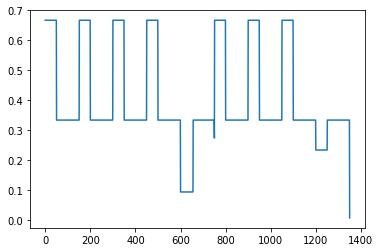

In [23]:
# compute_error_rate(trainings_data, h[-1])

# error_rates = [compute_error_rate(trainings_data, i) for i in h]

plt.plot(error_rates)
plt.show()

# Alternative Activation Functions

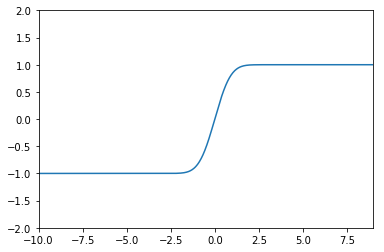

In [18]:
from scipy.special import erf


def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1


rnge = np.linspace(-10.0, 10.0, num=1000)
values = [erf(i) for i in rnge]
plt.plot(rnge, values)
plt.axis([-10, 9, -2, 2])

activation_function = erf

Error 0.006666666666666667 after 18501 iiterations
[-42.51712414  64.0583853 ]


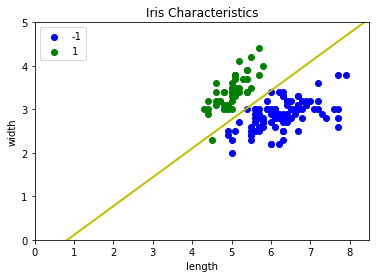

In [21]:
learned_weights, weight_history, error_rates = pla(trainings_data, no_iterations=-1, w_bias=True)
learned_weights = learned_weights[:2]
print(learned_weights)


plot_data(trainings_data, compute_line(learned_weights))

In [26]:
%%bash
mkdir data_dump

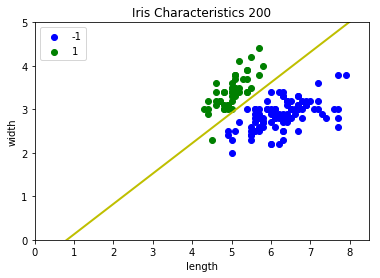

In [27]:
def plot_data(data, idx, w_line=(0, 0)):
    plt.clf()
    data_points, class_labels = list(zip(*data))
    data_points = np.array(data_points)
    class_labels = np.array(class_labels)

    colors = cycle('bgrcmy')
    for l, col in zip(np.unique(class_labels), colors):
        d =  data_points[class_labels == l]
        x = d[:,0]
        y = d[:,1]
        plt.scatter(d[:,0], d[:,1], c=col, label=l)
    
    if w_line != (0, 0):
        l = np.linspace(0, 8.5)
        m, b = w_line
        plt.plot(l, m * l + b, 'y-', lw=2)

    plt.axis([0, 8.5, 0, 5])
    plt.title('Iris Characteristics {}'.format(idx))
    plt.xlabel('length')
    plt.ylabel('width')
    plt.legend()
    plt.savefig('./data_dump/p_it{}'.format(idx), dpi=100, bbox_inches='tight')

    
for idx, w in enumerate(weight_history[::80]):
    plot_data(trainings_data, idx, compute_line(w[:2]))

In [28]:
%%bash
ls -ltrh ./data_dump/

total 10248
-rw-r--r--  1 rhp  staff    18K Nov 12 17:38 p_it2.png
-rw-r--r--  1 rhp  staff    17K Nov 12 17:38 p_it1.png
-rw-r--r--  1 rhp  staff    17K Nov 12 17:38 p_it0.png
-rw-r--r--  1 rhp  staff    24K Nov 12 17:39 p_it8.png
-rw-r--r--  1 rhp  staff    19K Nov 12 17:39 p_it7.png
-rw-r--r--  1 rhp  staff    19K Nov 12 17:39 p_it6.png
-rw-r--r--  1 rhp  staff    19K Nov 12 17:39 p_it5.png
-rw-r--r--  1 rhp  staff    17K Nov 12 17:39 p_it4.png
-rw-r--r--  1 rhp  staff    19K Nov 12 17:39 p_it3.png
-rw-r--r--  1 rhp  staff    20K Nov 12 17:39 p_it9.png
-rw-r--r--  1 rhp  staff    24K Nov 12 17:39 p_it14.png
-rw-r--r--  1 rhp  staff    21K Nov 12 17:39 p_it13.png
-rw-r--r--  1 rhp  staff    21K Nov 12 17:39 p_it12.png
-rw-r--r--  1 rhp  staff    21K Nov 12 17:39 p_it11.png
-rw-r--r--  1 rhp  staff    20K Nov 12 17:39 p_it10.png
-rw-r--r--  1 rhp  staff    22K Nov 12 17:39 p_it20.png
-rw-r--r--  1 rhp  staff    21K Nov 12 17:39 p_it19.png
-rw-r--r--  1 rhp  staff    22K Nov 12 17:39 p

In [29]:
# if you want to have this piece of code working on your VM run
# sudo apt-get install -y imagemagick
import os
import subprocess

basedir = './data_dump/'
pngs = [pl for pl in os.listdir(basedir) if pl.endswith('png')]
sorted_pngs = sorted(pngs, key=lambda a:int(a.split('p_it')[1][:-4]), reverse=False)
pngs = [os.path.join(basedir, png) for png in sorted_pngs]
pngs_str = ' '.join(pngs)
cmd = ("convert -delay 10 {} ./data_dump/animated.gif".format(pngs_str)).split()
proc = subprocess.Popen(cmd, stdin = subprocess.PIPE, stdout = subprocess.PIPE)
out, err = proc.communicate()

if not err:
    for png in pngs:
        os.remove(png)

# Learning Observed

![weights](./data_dump/animated.gif)

# Exercise

  * Implement the Perceptron Learning Algorithm (PLA) similarly as demonstrated above for the petal length and petal width.



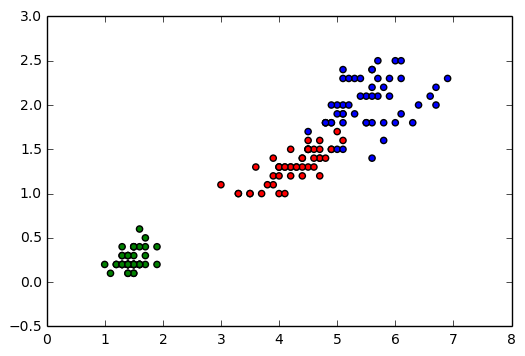

In [42]:
petal_length = transposed_data[2]
petal_width = transposed_data[3]


# The following lines are only to generate a list of labels, which may 
# only be numbers
labels = list(set(species))
number_labels = [labels.index(s) for s in species]
colors = ['red', 'green', 'blue']

plt.scatter(petal_length, petal_width, marker="o", 
            c=number_labels, cmap=matplotlib.colors.ListedColormap(colors))

  * Adapt the PLA algorithm to work on another dataset. For example, create a dataset with checkmarks and crosses that may appear on paper forms and train your perceptron to discriminate those.

  * Implement the Perceptron Learning Algorithm (PLA) similarly as demonstrated above for the following three-dimensional dataset.

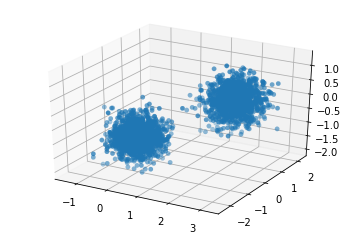

In [31]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs


centers = [[2, 1, 0], [0, -1, -1]]
data_3d, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.37)
x, y, z = data_3d[:,0], data_3d[:,1], data_3d[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidth=0.2)

plt.show()

# What else can I do with a single Perceptron?

For example, winning Flappy Bird. It will likely become quickly better than you!

But note, this neural network is not trained as described above -with gradient descent-. Instead it uses a genetic algorithms to find new weights for neuronal networks of future generations. That is, use some of the best individuals. Some randomly generated ones and some created by breeding from existing individuals.

https://github.com/xviniette/FlappyLearning

In [22]:
from IPython.display import IFrame
IFrame('http://xviniette.github.io/FlappyLearning/', width=550, height=600)

[-2.60105969  3.61349319]


<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

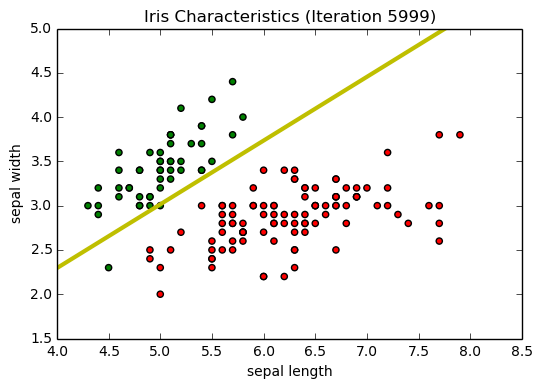

In [49]:
# Cleaned up version for teaching!
# PLA -- Perceptron Learning Algorithm
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# from numpy import array, dot, random
import numpy as np
import random
import math
import matplotlib.pyplot as plt



class Perceptron():

    def __init__(self, training_data, no_iterations=10000):
        # we fill our initial weights wit random numbers
        # vector w looks for example like: [0.9, 0.08]
        self.w = np.array([random.random() for i in range(2)])
        self.errors = []
        # eta is the learning rate...
        self.eta = 0.05
        self.no_iterations = no_iterations
        self.iter_no = 0
        self._lines = []
        # zip together the training data, it will have the form:
        # [((meassured_length, meassured_width), label), ...]
        self.training_data = training_data
        
        # self._plt = self._plot_data()
                
    def unit_step(self, x):
        if x < 0:
            return -1
        else:
            return 1

    def pla(self):
        iteration = 0
        error = random.random()
        # for x, expected in training_data * 100:
        for i in range(self.no_iterations):
        # while error != 0 or iteration > self.no_iterations:
        # while iteration > self.no_iterations:
            # idx = random.choice(range(len(training_data) - 1))
            x, expected = training_data[i % len(training_data)]
            x = np.array(x)
            result = np.dot(self.w, x)

            error = expected - self.unit_step(result)
            self.errors.append(error)
            self.w += self.eta * error * x
            self.iter_no = i
            self.plot_all(save_img=True, from_training=True)
            
    def predict(self, meassured_length_width_pair):
        x = np.array(meassured_length_width_pair)
        result = np.dot(self.w, meassured_length_width_pair)
        found_class = self.unit_step(result)
        return found_class

    def _plot_line(self):
        # Eukledian norm
        # norm = math.sqrt(self.w[0] ** 2 + self.w[1] ** 2)
        norm = np.linalg.norm(self.w)
        
        ww = self.w / norm
        
        ww1 = [ww[1], -ww[0]]
        ww2 = [-ww[1] , ww[0]]
        
        l = np.linspace(-10,10)
        
        # slope and intercept
        m = (ww2[1] - ww1[1]) / (ww2[0] - ww1[0])
        b = ((ww2[0] - ww1[0]) * m) + ww1[1]
        
        plt.plot(l, m * l + b, 'y-', lw=3)
        
        return plt
    
    def _plot_data(self, colors=['red', 'green']):
        plt.xlabel('sepal length')
        plt.ylabel('sepal width')

        data, label = list(zip(*self.training_data))
        width, length = list(zip(*data))
        
        plt.scatter(width, length , marker="o", c=label, 
                    cmap=matplotlib.colors.ListedColormap(colors))
        plt.axis([4, 8.5, 1.5, 5])
        
        return plt
    
    def _assemble_plot(self, save_img=False):
        if self.iter_no != 0:
            msg = 'Iris Characteristics (Iteration {})'.format(
                self.iter_no)
        else:
            msg = 'Iris Characteristics'
        # plt.figure(self.iter_no + 1)
        plt.clf()
        plt.title(msg)
        self._plot_data()
        self._plot_line()
        
        if save_img:
            self._save_plot()
            
    def plot_all(self, save_img=False, from_training=False):
        
        if not from_training:
            self._assemble_plot(save_img=save_img)
            plt.figure(self.iter_no)
        else:
            if self.iter_no % 100 == 0:
                self._assemble_plot(save_img=save_img)

        return plt
    
    def _save_plot(self):            
        plt.savefig('./data_dump/p_it{}'.format(self.iter_no), 
                     dpi=200, bbox_inches='tight')



training_data = list(zip(zip(sepal_length, sepal_width), 
                         bin_number_labels))
        
p = Perceptron(training_data, no_iterations=6000)
p.pla()
print(p.w)
p.plot_all()
# [-2.34181064  3.39946769]